### Set up environment

In [1]:
### UKCP18 30 mins
# 1 month of data 200101 - January, 2001
# 48 half hours * 30 days = 1440 time slices

### NIMROD 30 mins
# 1 day of data 20010106 - 6th January, 2001
# 48 half hours = 48 time slices

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Function to filter patches based on included colors
def create_patches(included_colors):
    dashed_colors = {'black', 'darkorange', 'darkgreen'}  # Colors that should be dashed
    patches = []

    for color, label in labels_and_colors:
        if color in included_colors:
            linestyle = 'dashed' if color in dashed_colors else 'solid'
            patch = mlines.Line2D([], [], color=color, linestyle=linestyle, linewidth=2, label=label)
            patches.append(patch)
    
    return patches


def plot_ccdf(axs,results,colors):
    for num, result in enumerate(results):
        if colors[num] in ['black', 'darkorange', 'darkgreen']:
            linestyle = 'dashed'
            linewidth=2
        else:
            linestyle = 'solid'
            linewidth=2.4
        axs.scatter(result[3], result[1] ,linewidth = linewidth, linestyle=linestyle,s=3, color = colors[num])
        axs.plot(result[3],result[1] ,linewidth = linewidth, color = colors[num], linestyle=linestyle,)

def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # precipitation_data= precipitation_data[precipitation_data>0.1]
    # Ensure last bin includes all values >= 35 mm
    bins_i_want = np.append(bins_i_want, [np.inf])  # Add an "infinity" bin

    # Compute histogram
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)

    # Compute cumulative distribution function (CDF)
    cdf = np.cumsum(hist * np.diff(bin_edges))

    # Compute complementary cumulative distribution function (CCDF)
    ccdf = 1 - cdf

    # Find bin centers (for plotting)
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # **Manually adjust the final bin center to be 35 mm**
    bin_centres[-1] = 35  # Last bin center is now fixed at 35 mm

    return cdf, ccdf, bin_centres, bin_edges[1:]

def read_array(file_name):
    arrays = []
    with open(file_name, 'rb') as f:
        while True:
            try:
                arrays.append(np.load(f))  # Read one .npy section at a time
            except ValueError:  # Reached end of file
                break

    # del arrays[2]                
                
    # Concatenate the recovered arrays
    final_array = np.concatenate(arrays)
    print(len(final_array))
    
    return arrays

In [2]:
season='wholeyear'

### Get model data for overlapping and not overlapping time periods

In [12]:
resolution = '2.2km_bng_masked'
ukcp18_hrly = read_array(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2001_2019_{resolution}_GB_{season}.npy')

In [5]:
resolution = '2.2km_bng_masked'
ukcp18_30m = np.memmap(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/2001_2019_{resolution}_GB_{season}_0.1_fixed.npy', 
                       dtype=np.float32, mode='r')
print(len(ukcp18_30m))

19301552551


In [3]:
resolution = '2.2km_regridded'
cehgear_full = read_array(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/1990_2016_{resolution}_GB_{season}.npy')

1188646028


In [5]:
cehgear_notfull = read_array(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/2001_2016_{resolution}_GB_{season}.npy')

850891419


In [16]:
resolution = "NIMROD_regridded_2.2km"
NIMROD_30m = read_array(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/30mins/2.2km_bng_masked_2006_2019_GB_{season}_filtered_100.npy')
NIMROD_30m_f = NIMROD_30m[NIMROD_30m <= 100]

1543133697


TypeError: '<=' not supported between instances of 'list' and 'int'

In [ ]:
resolution = "NIMROD_regridded_2.2km"
NIMROD_1h = read_array(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/1hr/2.2km_bng_masked_2006_2019_GB_{season}_filtered_100.npy')
NIMROD_1h_f = NIMROD_1h[NIMROD_1h <= 100]

## Calculate CDFs and CCDFs

## All

In [6]:
bins_i_want = np.array([0.0,0.1,0.2,0.4,0.8,1.2,1.6,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,22.0,24.0,26.0,28.0,30.0,32.0,34.0,36.0,38.0,40.0,44.0,48.0,52.0,56.0,60.0,64.0,9999.])

NIMROD_30m_f_results = calculate_ccdf_wetvalues(NIMROD_30m_f, bins_i_want)
NIMROD_1h_f_results = calculate_ccdf_wetvalues(NIMROD_1h_f, bins_i_want)

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply


In [7]:
labels_and_colors = [
    ('black', 'CEH-GEAR (Hourly)'),
    ('darkorange', 'UKCP18 (Hourly)'),
    ('purple', 'UKCP18 (30 mins)'),
    ('darkgreen', 'NIMROD (Hourly)'),
    ('lightgreen', 'NIMROD (30 mins)')]

### Steef bins

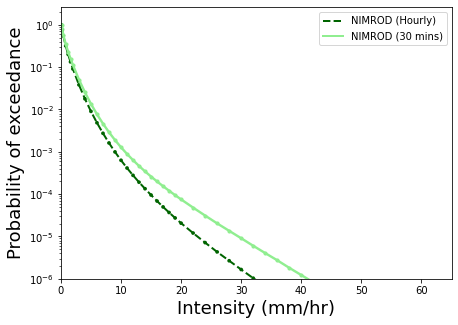

In [9]:
fig, ax = plt.subplots(figsize=(7,5))

results =  [NIMROD_1h_f_results, NIMROD_30m_f_results]
colors = ['darkgreen',  'lightgreen','darkgreen',  'lightgreen']
plot_ccdf(ax, results, colors)

patches = create_patches(colors)
ax.set_yscale('log')
ax.legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr)', fontsize=18)
ax.set_ylabel('Probability of exceedance', fontsize=18)
ax.set_xlim(0,65)
ax.set_ylim(1e-6, None)

patches = create_patches(['black', 'firebrick', 'darkorange','darkgreen','lightgreen'])
fig.savefig("../../FindIndependentRainfallEvents/AnalyseProfiles/Figs/model_evaluation.png", dpi=200, bbox_inches='tight') 

849155828
1543133697


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply


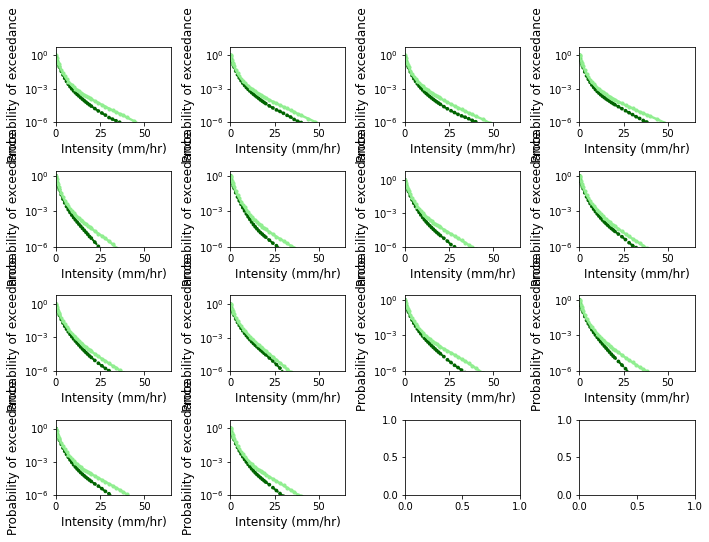

In [17]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(10, 7))  # Adjusted to 3x4 for 10 plots
axs = axs.flatten()  # Flatten to access as a 1D array

resolution = "NIMROD_regridded_2.2km"

NIMROD_1h_all  = read_array(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/1hr/2.2km_bng_masked_2006_2019_GB_{season}_filtered_100.npy')
NIMROD_30m_all = read_array(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/30mins/2.2km_bng_masked_2006_2019_GB_{season}_filtered_100.npy')
colors = ['darkgreen', 'lightgreen']

for i in range(14):  # Adjusted range
    NIMROD_1h =  NIMROD_1h_all[i]
    NIMROD_30m = NIMROD_30m_all[i]

    NIMROD_1h_f = NIMROD_1h[NIMROD_1h <= 100]
    NIMROD_30m_f = NIMROD_30m[NIMROD_30m <= 100]

    NIMROD_30m_f_results = calculate_ccdf_wetvalues(NIMROD_30m_f, bins_i_want)
    NIMROD_1h_f_results = calculate_ccdf_wetvalues(NIMROD_1h_f, bins_i_want)

    results = [NIMROD_1h_f_results, NIMROD_30m_f_results]

    plot_ccdf(axs[i], results, colors)
    axs[i].set_yscale('log')
    axs[i].set_xlabel('Intensity (mm/hr)', fontsize=12)
    axs[i].set_ylabel('Probability of exceedance', fontsize=12)
    axs[i].set_xlim(0, 65)
    axs[i].set_ylim(1e-6, None)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply


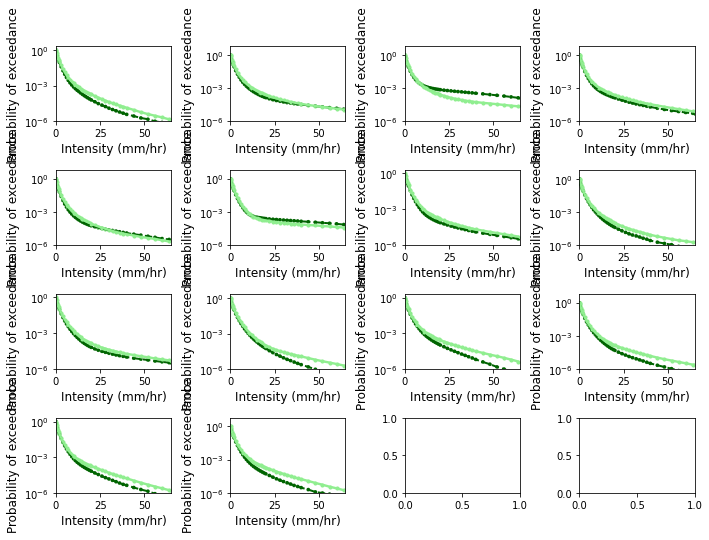

In [61]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(10, 7))  # Adjusted to 3x4 for 10 plots
axs = axs.flatten()  # Flatten to access as a 1D array

resolution = "NIMROD_regridded_2.2km"

NIMROD_1h_all  = read_array(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/1hr/2.2km_bng_masked_2006_2019_GB_{season}.npy')
NIMROD_30m_all = read_array(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/30mins/2.2km_bng_masked_2006_2019_GB_{season}.npy')
colors = ['darkgreen', 'lightgreen']

for i in range(14):  # Adjusted range
    NIMROD_1h =  NIMROD_1h_all[i]
    NIMROD_30m = NIMROD_30m_all[i]

    NIMROD_1h_f = NIMROD_1h[NIMROD_1h <= 100]
    NIMROD_30m_f = NIMROD_30m[NIMROD_30m <= 100]

    NIMROD_30m_f_results = calculate_ccdf_wetvalues(NIMROD_30m_f, bins_i_want)
    NIMROD_1h_f_results = calculate_ccdf_wetvalues(NIMROD_1h_f, bins_i_want)

    results = [NIMROD_1h_f_results, NIMROD_30m_f_results]

    plot_ccdf(axs[i], results, colors)
    axs[i].set_yscale('log')
    axs[i].set_xlabel('Intensity (mm/hr)', fontsize=12)
    axs[i].set_ylabel('Probability of exceedance', fontsize=12)
    axs[i].set_xlim(0, 65)
    axs[i].set_ylim(1e-6, None)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### old bins

In [63]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35]
# ukcp18_hrly_results_old = calculate_ccdf_wetvalues(ukcp18_hrly,bins_i_want)
# ukcp18_30m_results_old = calculate_ccdf_wetvalues(ukcp18_30m, bins_i_want)

# cehgear_results_old  = calculate_ccdf_wetvalues(cehgear, bins_i_want)
# cehgear_results_f_old  = calculate_ccdf_wetvalues(cehgear_f, bins_i_want)

NIMROD_30m_results_old = calculate_ccdf_wetvalues(NIMROD_30m,bins_i_want)
NIMROD_1h_results_old = calculate_ccdf_wetvalues(NIMROD_1h,bins_i_want)

NIMROD_30m_f_results_old = calculate_ccdf_wetvalues(NIMROD_30m_f,bins_i_want)
NIMROD_1h_f_results_old = calculate_ccdf_wetvalues(NIMROD_1h_f,bins_i_want)

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply


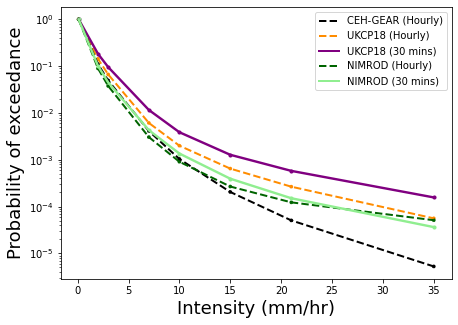

In [67]:
fig, ax = plt.subplots(figsize=(7,5))

results =  [ukcp18_hrly_results_old , ukcp18_30m_results_old, cehgear_results_old, NIMROD_1h_f_results_old, NIMROD_30m_f_results_old]
colors =  [ 'darkorange', 'purple', 'black',  'darkgreen', 'lightgreen']
plot_ccdf(ax, results, colors)

patches = create_patches(colors)
ax.set_yscale('log')
ax.legend(handles=patches)
ax.set_xlabel('Intensity (mm/hr)', fontsize=18)
ax.set_ylabel('Probability of exceedance', fontsize=18)

fig.savefig("../../FindIndependentRainfallEvents/AnalyseProfiles/Figs/model_evaluation.png", dpi=200, bbox_inches='tight') 

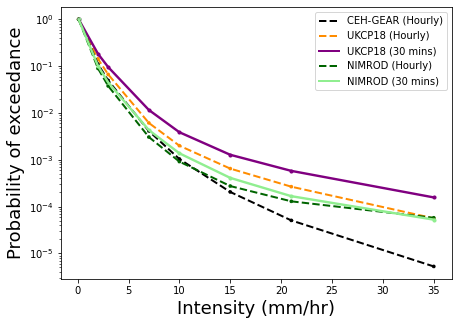

In [64]:
fig, ax = plt.subplots(figsize=(7,5))

results =  [ukcp18_hrly_results_old , ukcp18_30m_results_old, cehgear_results_old, NIMROD_1h_results_old, NIMROD_30m_results_old]
colors =  [ 'darkorange', 'purple', 'black',  'darkgreen', 'lightgreen']
plot_ccdf(ax, results, colors)

patches = create_patches(colors)
ax.set_yscale('log')
ax.legend(handles=patches)
ax.set_xlabel('Intensity (mm/hr)', fontsize=18)
ax.set_ylabel('Probability of exceedance', fontsize=18)

fig.savefig("../../FindIndependentRainfallEvents/AnalyseProfiles/Figs/model_evaluation.png", dpi=200, bbox_inches='tight') 